In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [4]:
from helpers import load_data

# load dataset
x, y = load_data()

In [5]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [6]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    test_index = k_indices[k]
    train_index = [i for j in range(len(k_indices)) if j != k for i in k_indices[j]]
    
    test_x = [x[i] for i in test_index]
    test_y = [y[i] for i in test_index]
    
    train_x = [x[i] for i in train_index]
    train_y = [y[i] for i in train_index]

    poly_train_x = build_poly(train_x, degree)
    poly_test_x = build_poly(test_x, degree)

    w = ridge_regression(train_y, poly_train_x, lambda_)

    loss_tr = compute_mse(train_y, poly_train_x, w)
    loss_te = compute_mse(test_y, poly_test_x, w)
    return loss_tr, loss_te

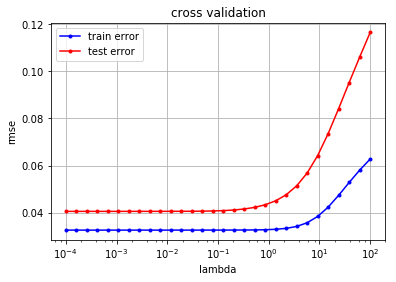

In [7]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
#     degrees = [3, 7, 10, 15]
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
 
    for lamb in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, 0, lamb, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

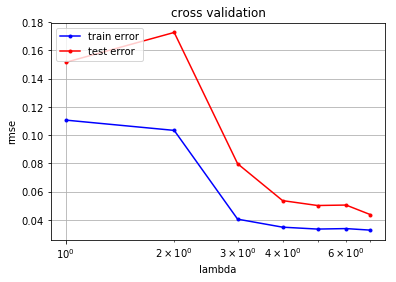

In [8]:
def cross_validation_demo_degree():
    seed = 1
    degrees = list(range(1, 8))
    k_fold = 4
    lambda_= 1
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
 
    for degree in degrees:
        loss_tr, loss_te = cross_validation(y, x, k_indices, 0, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
    cross_validation_visualization(degrees, rmse_tr, rmse_te)
cross_validation_demo_degree()

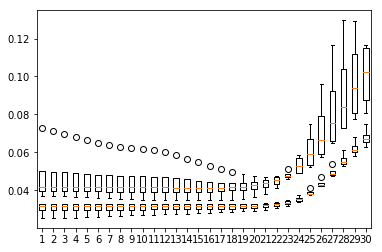

In [9]:
import statistics
def cross_validation_demo_variance():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    
    loss_tr_lambda = []
    loss_te_lambda = []
    for lamb in lambdas:
        rmse_tr = []
        rmse_te = []
        for kin in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, kin, lamb, degree)
            rmse_tr.append(loss_tr)
            rmse_te.append(loss_te)
        
#         mean_tr = statistics.mean(loss_tr)
#         var_tr = statistics.variance(loss_tr)
        
#         mean_te = statistics.mean(loss_te)
#         var_tr = statistics.variance(loss_te)
#         loss_tr_lambda.append([mean_tr, var_tr])
#         loss_te_lambda.append([mean_te, var_te])
        loss_tr_lambda.append(rmse_tr)
        loss_te_lambda.append(rmse_te)
    import plotly.graph_objs as go
    
    import matplotlib.pyplot as plt
    plt.boxplot(np.asarray(loss_tr_lambda).T)
    plt.boxplot(np.asarray(loss_te_lambda).T)
        
cross_validation_demo_variance()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.05
    degrees = range(1, 30)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 1 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(list(degrees)):
#             print(degree)
            poly_x_tr = build_poly(x_tr, degree)
            poly_x_te = build_poly(x_te, degree)
            
            w = ridge_regression(y_tr, poly_x_tr, 0.5)
#             print(w)
            loss_tr = compute_mse(y_tr, poly_x_tr, w)
            loss_te = compute_mse(y_te, poly_x_te, w)
            
            rmse_tr[index_seed][index_degree] = loss_tr
            rmse_te[index_seed][index_degree] = loss_te
#         print(rmse_tr)
    bias_variance_decomposition_visualization(list(degrees), rmse_tr, rmse_te)

bias_variance_demo()